## Simulación del intervalo de confianza como variable aleatoria

Supongamos que tenemos un experimento aleatorio que genera una VA normal $N(\mu, \sigma^2)$ con media $\mu$ y varianza $\sigma^2$.  Generamos mediante simulación muestras aleatorias de tamaño N y vemos qué pasa con los intervalos de confianza de un nivel de confianza $1-\alpha$.

In [137]:
mu = 10         # parámetros de la gaussiana
sigma = 4

alpha = 0.07   # nivel de confianza
N = 20         # Tamaño de la muestra

In [138]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

In [139]:
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
G = st.norm(loc=mu, scale=sigma)
y = G.pdf(x)

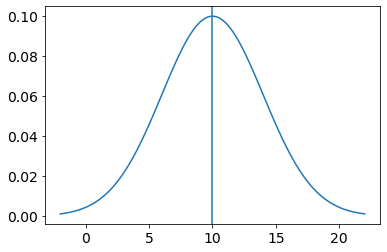

In [140]:
plt.plot(x, y)
plt.axvline(mu)

La distribución esperada de la media es $N(\mu, \frac{\sigma^2}{N})$

In [141]:
Sn = sigma / np.sqrt(N)
x = np.linspace(mu-3*Sn, mu+3*Sn, 100)
Gm = st.norm(loc=mu, scale=Sn)
ym = Gm.pdf(x)

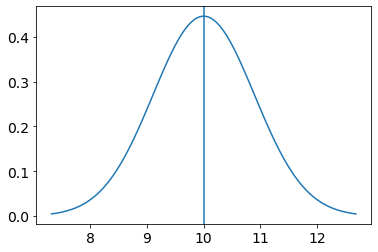

In [142]:
plt.plot(x, ym)
plt.axvline(mu)

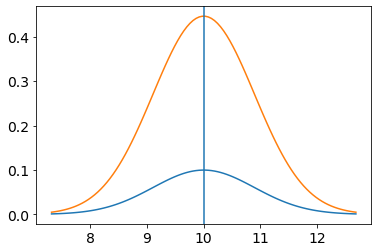

In [143]:
plt.plot(x, y)
plt.plot(x, ym)
plt.axvline(mu)

Sorteamos muestras aleatorias:

In [144]:
M = 1000        # cantidad de experimentos
rmean = []
rsd = []
for i in range(M):
    r = G.rvs(size=N)
    rmean.append(r.mean())
    rsd.append(r.std())

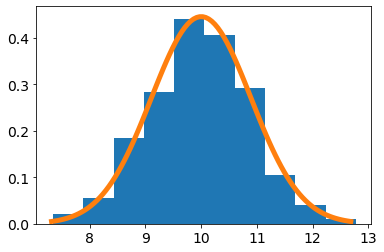

In [145]:
plt.hist(rmean, density=True)
plt.plot(x, Gm.pdf(x), linewidth=5)

In [158]:
M = 50        # cantidad de experimentos

N = 20
Sn = sigma / np.sqrt(N)
Gm = st.norm(loc=mu, scale=Sn)

rmean = []
rsd = []
for i in range(M):
    r = G.rvs(size=N)
    rmean.append(r.mean())
    rsd.append(r.std())

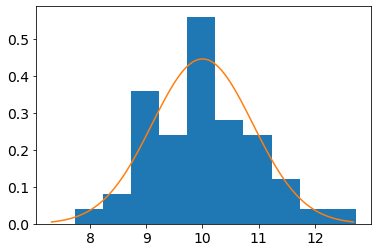

In [159]:
plt.hist(rmean, density=True)
x = np.linspace(mu-3*Sn, mu+3*Sn, 100)
plt.plot(x, Gm.pdf(x))

In [160]:
rmean_s = rmean.copy()
rmean_s.sort()

q = np.linspace(0, 1, M)

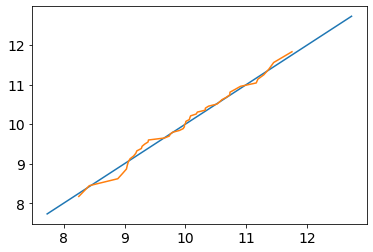

In [161]:
plt.plot(rmean_s,rmean_s)
plt.plot(rmean_s, Gm.ppf(q))

Veamos los intervalos de confianza

In [162]:
from matplotlib import collections as mc

In [163]:
lines = np.column_stack([range(M), rmean_s-Sn, range(M), rmean_s+Sn])
L = lines.reshape(M,2,2)

In [164]:
out = ((L[:,0,1] < mu) & (L[:,1,1] < mu)) | ((L[:,0,1] > mu) & (L[:,1,1] > mu))

In [165]:
unique, counts = np.unique(out, return_counts=True) 
dict(zip(unique, counts))

{False: 33, True: 17}

In [166]:
print(1-sum(out)/M)

0.6599999999999999


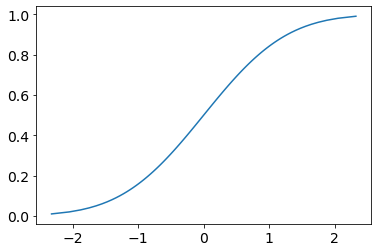

In [167]:
Ns = st.norm()
t = np.arange(0, 1, 0.01)
y = Ns.ppf(t)
plt.plot(y, t)

In [168]:
Ns.cdf(1) - Ns.cdf(-1)

0.6826894921370859

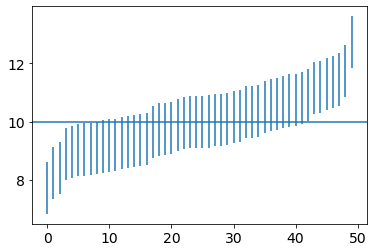

In [169]:
lc = mc.LineCollection(L)
fig, ax = plt.subplots() 
ax.add_collection(lc) 
ax.autoscale() 
ax.axhline(mu)

In [74]:
color = np.repeat('blue', M)
color[out] = 'red'

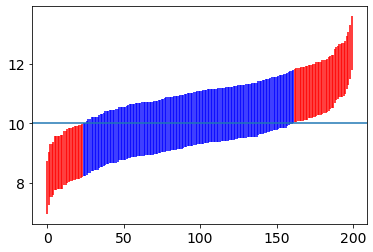

In [75]:
lc = mc.LineCollection(L, color=color)
fig, ax = plt.subplots() 
ax.add_collection(lc) 
ax.autoscale() 
ax.axhline(mu)

In [76]:
lines = np.column_stack([range(M), rmean-Sn, range(M), rmean+Sn])
L = lines.reshape(M,2,2)
out = ((L[:,0,1] < mu) & (L[:,1,1] < mu)) | ((L[:,0,1] > mu) & (L[:,1,1] > mu))
color = np.repeat('blue', M)
color[out] = 'red'

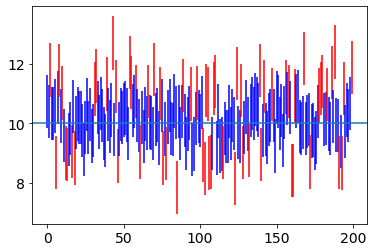

In [77]:
lc = mc.LineCollection(L, color=color)
fig, ax = plt.subplots() 
ax.add_collection(lc) 
ax.autoscale() 
ax.axhline(mu)

In [41]:
alpha = 0.2
q1 = alpha/2
q2 = 1 - q1

In [50]:
print(f'q1={q1}\nq2={q2}\nq2-q1={q2-q1}')

q1=0.1
q2=0.9
q2-q1=0.8


In [40]:
M = 200        # cantidad de experimentos

N = 20
Sn = sigma / np.sqrt(N)
Gm = st.norm(loc=mu, scale=Sn)

rmean = []
rsd = []
for i in range(M):
    r = G.rvs(size=N)
    rmean.append(r.mean())
    rsd.append(r.std())

In [43]:
Gm.ppf(q1)

8.853745433108399

In [44]:
Gm.ppf(q2)

11.146254566891601

In [83]:
Sn

0.8944271909999159